In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree

In [ ]:
attribute_names = (
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary-class',
)

In [ ]:
df = pd.read_csv("/content/adult.data" , names = attribute_names , sep = ', ' , engine = "python")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
excludes = (
    'fnlwgt',
    'education-num',
    'capital-gain',
    'capital-loss'
)
for i in excludes:
  del df[i]
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [ ]:
booleans = (
    'sex',
    'native-country',
    'salary-class'
)
for i in booleans :
  df[i] = df[i].astype('category')
  df[i] = df[i].cat.codes
df

,age,workclass,education,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary-class
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,1,40,39,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,1,13,39,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,1,40,39,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,39,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,0,38,39,0
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,1,40,39,1
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,0,40,39,0
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,1,20,39,0


In [ ]:
categoricals = (
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race'
)
for i in categoricals:
  df = pd.concat([df , pd.get_dummies(df[i] , prefix = i)] , axis = 1)
  del df[i]
df.head()

,age,sex,hours-per-week,native-country,salary-class,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
y = df["salary-class"]
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary-class, Length: 32561, dtype: int8

In [ ]:
X = df.copy()
X = X.drop(columns = "salary-class")
X.head()

,age,sex,hours-per-week,native-country,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,39,1,40,39,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,1,13,39,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,1,40,39,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,53,1,40,39,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,5,0,0,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(
    X,
    y,
    test_size = 0.33 ,
    random_state = 0
)

In [ ]:
tree = DecisionTreeClassifier(
    random_state = 0, criterion = 'entropy'
)
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_train_pred = tree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train : " , train_accuracy)

Train :  0.9731377492550997


In [ ]:
y_test_pred = tree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train : " , test_accuracy)

Train :  0.7814070351758794


In [ ]:
df["salary-class"].value_counts()

0    24720
1     7841
Name: salary-class, dtype: int64

Minimum Sample Split : 2
Train :  0.9731377492550997
Test :  0.7814070351758794
Minimum Sample Split : 3
Train :  0.9596149438459776
Test :  0.785036292573981
Minimum Sample Split : 5
Train :  0.9443502177400871
Test :  0.7874557975060488
Minimum Sample Split : 10
Train :  0.918450607380243
Test :  0.7956448911222781
Minimum Sample Split : 20
Train :  0.893788677515471
Test :  0.8073701842546064
Minimum Sample Split : 50
Train :  0.8678890671556269
Test :  0.8169551461008747
Minimum Sample Split : 100
Train :  0.8563373825349531
Test :  0.8237483714870649
Minimum Sample Split : 250
Train :  0.8407059362823746
Test :  0.8238414293690676
Minimum Sample Split : 500
Train :  0.8343800137520055
Test :  0.8238414293690676
Minimum Sample Split : 750
Train :  0.8323630529452212
Test :  0.8248650660710962
Minimum Sample Split : 1000
Train :  0.8292459316983727
Test :  0.8228177926670389
Minimum Sample Split : 2500
Train :  0.8230116892046757
Test :  0.8191885352689373
Minimum Sample Split : 500

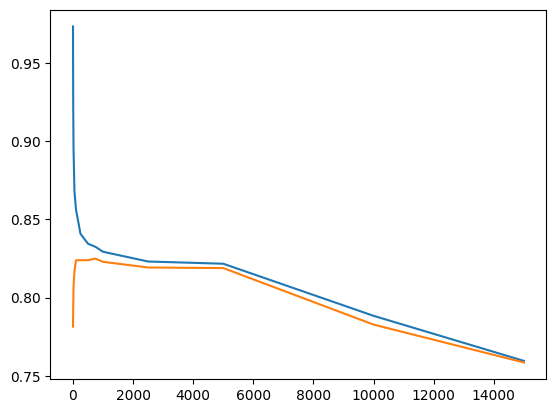

In [ ]:
prune = [ 2, 3, 5, 10, 20, 50, 100, 250, 500, 750, 1000, 2500, 5000, 10000, 15000]
train_accuracies = []
test_accuracies = []

for p in prune:
  tree = DecisionTreeClassifier(
      random_state = 0, criterion = 'entropy', min_samples_split = p
  )
  tree.fit(X_train, y_train)
  print("Minimum Sample Split :" , p)
  y_train_pred = tree.predict(X_train)
  train_accuracy = accuracy_score(y_train, y_train_pred)
  print("Train : " , train_accuracy)

  y_test_pred = tree.predict(X_test)
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print("Test : " , test_accuracy)

  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

plt.plot(prune, train_accuracies )
plt.plot(prune,  test_accuracies)
plt.show()

